# Financial Prediction using Machine Learning Part I: Data Preparation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import Libaries
import workshop_library as wl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 8.0)
fontsize=20
from workshop_library import data_manager

## Load financial data from source

In [3]:
wl.initialize_data_for_symbols()

SPY
GLD
VXX


TooManyRedirects: Exceeded 30 redirects.

In [8]:
# Choose Data from SPY, VIX, EURUSD, VXX, XIV, GLD
df = wl.get_symbol('SPY')
df.head(3)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1993-12-31,46.9375,47.0000,46.5625,46.5937,29.858997,312900
1,1994-01-03,46.5937,46.6562,46.4062,46.4687,29.778881,960900
2,1994-01-04,46.5312,46.6562,46.4687,46.6562,29.899038,164300


In [9]:
# Add technical Indicators to the data
df = data_manager.add_technical_indicators(df=df, date_column = 'Date')

In [10]:
# Join Economic Data, e.g. Unemployment Data
#df = utils.join_unemployment_data(df)

In [11]:
# calculate a volatility variable to see how easily technical indicators can be constructed
df['vola_3m'] = df['close'].pct_change().abs().rolling(window=60).mean()
df['direction_target'] = df['ret_1d'] > 0

In [12]:
#look at the data in tabular form
df.head()

,atr,tr,cci_20,rsv_30,rsv_60,rsv_12,rsv_7,rsv_5,wr_12,macd,...,mom_10_ma_50,mom_60_ma_100,mom_10_ma_100,mom_60_ma_200,mom_10_ma_200,ret_1d,ret_10d,ret_20d,vola_3m,direction_target
date,,,,,,,,,,,,,,,,,,,,,
1993-12-31,NaN,NaN,NaN,7.131429,7.131429,7.131429,7.131429,7.131429,92.868571,0.000000,...,NaN,NaN,NaN,NaN,NaN,-0.002683,0.017438,0.027499,NaN,False
1994-01-03,0.250000,0.2500,-66.666667,10.525429,10.525429,10.525429,10.525429,10.525429,89.474571,-0.002804,...,NaN,NaN,NaN,NaN,NaN,0.004035,0.020175,0.037660,NaN,True
1994-01-04,0.217593,0.1875,-12.507499,42.101718,42.101718,42.101718,42.101718,42.101718,57.898282,0.002241,...,NaN,NaN,NaN,NaN,NaN,0.002010,0.017415,0.028131,NaN,True
1994-01-05,0.229205,0.2500,52.868491,57.898282,57.898282,57.898282,57.898282,57.898282,42.101718,0.007867,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.012699,0.032753,NaN,False
1994-01-06,0.208878,0.1562,86.734139,57.898282,57.898282,57.898282,57.898282,57.898282,42.101718,0.010759,...,NaN,NaN,NaN,NaN,NaN,0.006015,0.015373,0.028075,NaN,True


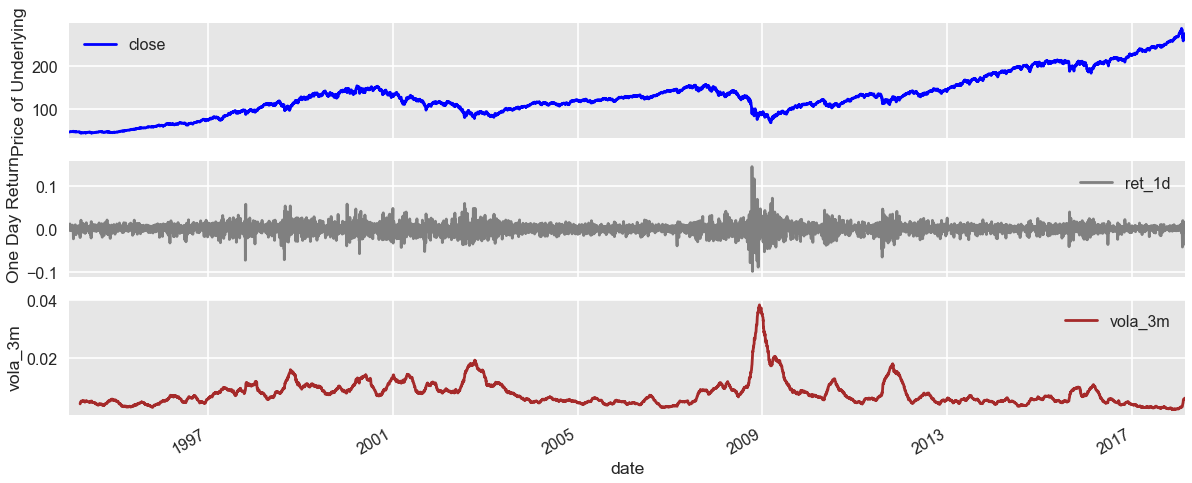

In [13]:
# Plot the underlying (e.g. DAX) Price series and some technical indicators
ax = df[['close', 'ret_1d', 'vola_3m']].plot(subplots=True, color = ['b', 'grey', 'brown'])
ax[0].set_ylabel('Price of Underlying');
ax[1].set_ylabel('One Day Return');
ax[2].set_ylabel('vola_3m');

In [14]:
# calculate the number of input variables
number_input_variables =  (df.shape[1] - 3)

>all in all we have {{number_input_variables}} explaining variables in our data set

### For a better understanding, look into Technical Explaining Variables

> #### Note: We don't want to do technical chart analyses and come up with simple "if x then y" rules! But many technical indicators help the machine to understand what price movements are expected

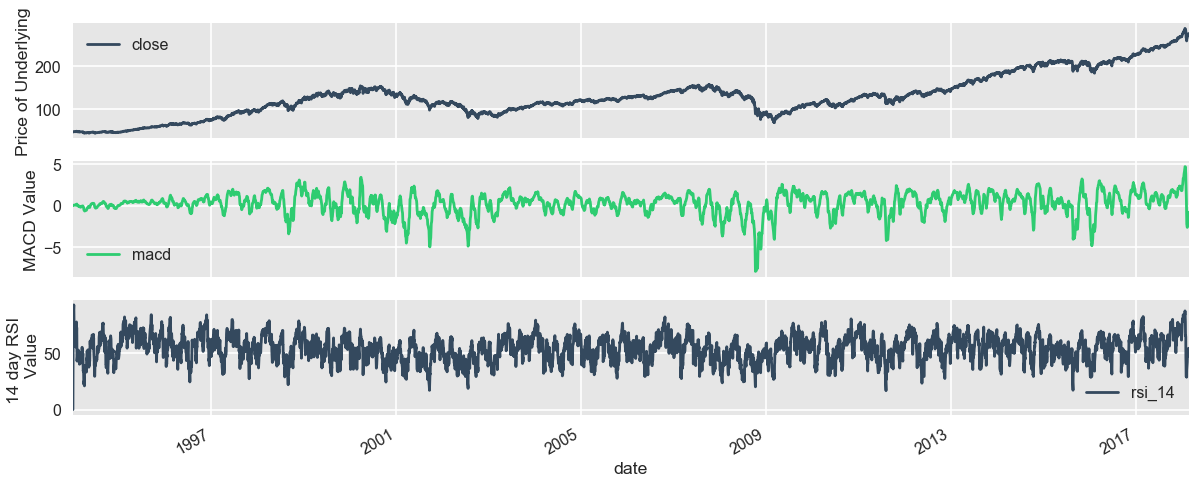

In [15]:
# Plot some technical indicators
ax = df[['close', 'macd', 'rsi_14']].plot(subplots = True);
ax[0].set_ylabel('Price of Underlying');
ax[1].set_ylabel('MACD Value');
ax[2].set_ylabel('14 day RSI \n Value');

In [16]:
# clean data from missing values nans (these could also be handled differently, 
# but removing is a safe way to not introduce look ahead biases)
df.dropna(inplace=True)

In [17]:
# save the cleansed data in a csv file for use in the machine learning part
df.index.name = 'Date'
df.reset_index(inplace=True)
df.to_csv('financial_data.csv', index=False)